In [1]:
# some useful mysklearn package import statements and reloads
import importlib
import matplotlib.pyplot as plt

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.pokemonDiscretizers
importlib.reload(mysklearn.pokemonDiscretizers)
import mysklearn.pokemonDiscretizers as pokemonDiscretizers

In [2]:
pokemonData = MyPyTable()
completePokemonData = MyPyTable()

pokemonData.load_from_file("pokemon.csv")
completePokemonData.load_from_file("pokemon.csv")

# pokemonData.pretty_print()
# for i, val in enumerate(pokemonData.column_names):
#     if i > 20:
#         print(i, val)

cols_to_drop = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 24, 29, 30, 31, 32, 39]
pokemonData.drop_cols(cols_to_drop)
# for i, val in enumerate(pokemonData.column_names):
#     print(i, val)

# count = 0
# for i, val in enumerate(pokemonData.data):
#     if pokemonData.data[i][-1] == 1.0:
#         count += 1
#         print(val)

# pokemonData.pretty_print()
pokemonData.save_to_file("dropped_pokemon.csv")

[5.0, 50.0, 95.0, 140.0, 185.0, 230.0]
[171, 449, 157, 20, 4]


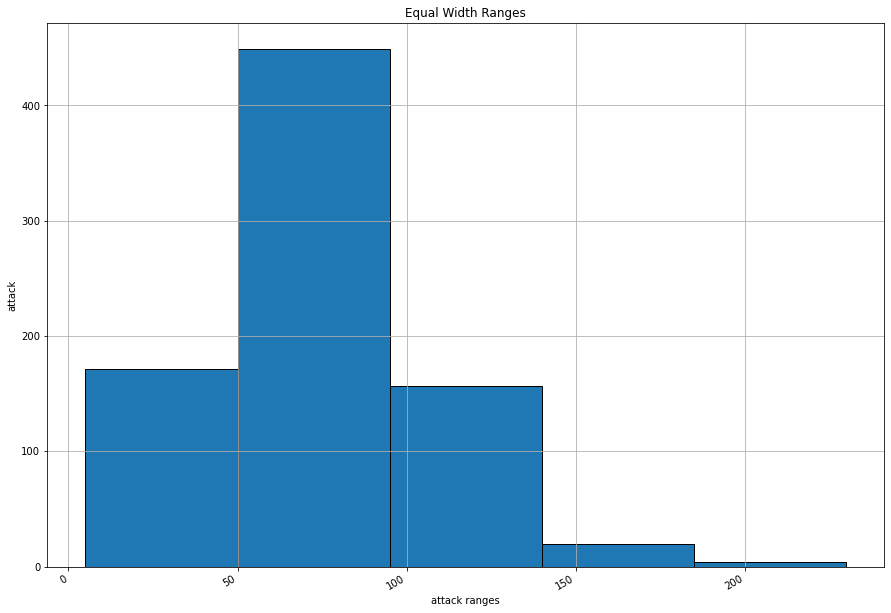

In [3]:
col = pokemonData.get_column("defense")
# for i, val in enumerate(col):
#     print(col)

cutoffs = pokemonDiscretizers.compute_equal_width_cutoffs(col, 5)
print(cutoffs)
# 2. 
freqs = pokemonDiscretizers.compute_bin_frequencies(col, cutoffs)
print(freqs)
# 3.
plt.figure(figsize=(15, 10))
plt.bar(cutoffs[:-1], freqs, width=(cutoffs[1] - cutoffs[0]), edgecolor="black", align="edge")
plt.title("Equal Width Ranges")
plt.xlabel("attack ranges")
plt.ylabel("attack")
plt.xticks(rotation=30, ha="right") # parallel lines
plt.grid(True)
plt.show()

In [4]:
# attack
attack = pokemonData.get_column("attack")
dis_attack = pokemonDiscretizers.attack_discretizer(attack)
attack_index = pokemonData.column_names.index("attack")
# defense
defense = pokemonData.get_column("defense")
dis_defense = pokemonDiscretizers.defense_discretizer(defense)
defense_index = pokemonData.column_names.index("defense")
# hp
hp = pokemonData.get_column("hp")
dis_hp = pokemonDiscretizers.hp_discretizer(hp)
hp_index = pokemonData.column_names.index("hp")
# sp_defense
sp_defense = pokemonData.get_column("sp_defense")
dis_sp_defense = pokemonDiscretizers.sp_defense_discretizer(sp_defense)
sp_defense_index = pokemonData.column_names.index("sp_defense")
# sp_attack
sp_attack = pokemonData.get_column("sp_attack")
dis_sp_attack = pokemonDiscretizers.sp_attack_discretizer(sp_attack)
sp_attack_index = pokemonData.column_names.index("sp_attack")
# speed
speed = pokemonData.get_column("speed")
dis_speed = pokemonDiscretizers.speed_discretizer(speed)
speed_index = pokemonData.column_names.index("speed")
# base_happiness
base_happiness = pokemonData.get_column("base_happiness")
dis_base_happiness = pokemonDiscretizers.base_happiness_discretizer(base_happiness)
base_happiness_index = pokemonData.column_names.index("base_happiness")
# base_total
base_total = pokemonData.get_column("base_total")
dis_base_total = pokemonDiscretizers.base_total_discretizer(base_total)
base_total_index = pokemonData.column_names.index("base_total")
# capture_rate
capture_rate = pokemonData.get_column("capture_rate")
dis_capture_rate = pokemonDiscretizers.capture_rate_discretizer(capture_rate)
capture_rate_index = pokemonData.column_names.index("capture_rate")
# experience_growth
experience_growth = pokemonData.get_column("experience_growth")
dis_experience_growth = pokemonDiscretizers.experience_growth_discretizer(experience_growth)
experience_growth_index = pokemonData.column_names.index("experience_growth")
# height_m
height_m = pokemonData.get_column("height_m")
dis_height_m = pokemonDiscretizers.height_m_discretizer(height_m)
height_m_index = pokemonData.column_names.index("height_m")
# weight_kg
weight_kg = pokemonData.get_column("weight_kg")
dis_weight_kg = pokemonDiscretizers.weight_kg_discretizer(weight_kg)
weight_kg_index = pokemonData.column_names.index("weight_kg")

# type 2 for monotypes
type2_index = pokemonData.column_names.index("type2")

for i in range(len(pokemonData.data)):
    pokemonData.data[i][attack_index] = dis_attack[i]
    pokemonData.data[i][defense_index] = dis_defense[i]
    pokemonData.data[i][sp_attack_index] = dis_sp_attack[i]
    pokemonData.data[i][sp_defense_index] = dis_sp_defense[i]
    pokemonData.data[i][hp_index] = dis_hp[i]
    pokemonData.data[i][speed_index] = dis_speed[i]
    pokemonData.data[i][height_m_index] = dis_height_m[i]
    pokemonData.data[i][weight_kg_index] = dis_weight_kg[i]
    pokemonData.data[i][base_total_index] = dis_base_total[i]
    pokemonData.data[i][base_happiness_index] = dis_base_happiness[i]
    pokemonData.data[i][capture_rate_index] = dis_capture_rate[i]
    pokemonData.data[i][experience_growth_index] = dis_experience_growth[i]

    if pokemonData.data[i][type2_index] == "":
        pokemonData.data[i][type2_index] = "null"


# pokemonData.pretty_print()  


In [5]:
X = pokemonData.data
y = []

for i in range(len(X)):
    val = str(int(X[i][-1]))
    y.append(val)
    del X[i][-1]

# print(X)
# print(y)
X_train_folds_1, X_test_folds_1 = myevaluation.stratified_kfold_cross_validation(X, y, 10)

In [6]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 5
digits = 3

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # do the classifying
    classifier = MyDummyClassifier()

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for i in range(len(y_test)):
        sk_fold_y_true.append(y_test[i])
        sk_fold_y_pred.append(y_pred[i])

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.basketball_titanic_helper("Dummy Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)

Accuracy =  0.913 , Error rate = 0.087
Precision =  1.825 , Recall  = 2.0 , F1  = 1.909
Dummy Classifier (Stratified 10 Fold Cross Validation):

 BASKETBALL     A   H   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  731    0      731              100.0
            1   70    0       70                0.0


In [7]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

nameIndex = completePokemonData.column_names.index("name")
nameLegendPreds = []

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # do the classifying
    classifier = MyNaiveBayesClassifier()

    classifier.fit(X_train, y_train)
    # print(X_test)
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for q in range(len(y_test)):
        sk_fold_y_true.append(y_test[q])
        sk_fold_y_pred.append(y_pred[q])
    
    # print legend predicts
    for j in range(len(X_test_folds_1[i])):
        if y_pred[j] == "1":
            nameLegendPreds.append(completePokemonData.data[X_test_folds_1[i][j]][nameIndex])

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.pokemon_matrix_print_helper("Naive Bayes Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)
print(nameLegendPreds)    

Accuracy =  0.951 , Error rate = 0.049
Precision =  0.981 , Recall  = 0.966 , F1  = 0.973
Naive Bayes Classifier (Stratified 10 Fold Cross Validation):

Pokemon Legend  0    1   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  706   25      731              96.58
            1   14   56       70               80.0
['Gardevoir', 'Kommo-o', 'Articuno', 'Celebi', 'Deoxys', 'Manaphy', 'Reshiram', 'Diancie', 'Lunala', 'Aerodactyl', 'Salamence', 'Volcarona', 'Zapdos', 'Uxie', 'Darkrai', 'Hoopa', 'Venusaur', 'Moltres', 'Mesprit', 'Shaymin', 'Landorus', 'Buzzwole', 'Houndoom', 'Garchomp', 'Gallade', 'Mewtwo', 'Registeel', 'Azelf', 'Arceus', 'Tapu Koko', 'Pheromosa', 'Alakazam', 'Dragonair', 'Mew', 'Latias', 'Dialga', 'Victini', 'Keldeo', 'Tapu Lele', 'Xurkitree', 'Charizard', 'Dragonite', 'Ampharos', 'Blaziken', 'Raikou', 'Latios', 'Palkia', 'Cobalion', 'Meloetta', 'Tapu Bulu', 'Pinsir', 'Entei', 'Kyogre', 'Heatran', 'Terrakion', 'Genesect', 'Tapu Fin

In [8]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

nameIndex = completePokemonData.column_names.index("name")
nameLegendPreds = []

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # do the classifying
    classifier = MyDecisionTreeClassifier()

    classifier.fit(X_train, y_train)
    # print(X_test)
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for q in range(len(y_test)):
        sk_fold_y_true.append(y_test[q])
        sk_fold_y_pred.append(y_pred[q])
    
    # print legend predicts
    for j in range(len(X_test_folds_1[i])):
        if y_pred[j] == "1":
            nameLegendPreds.append(completePokemonData.data[X_test_folds_1[i][j]][nameIndex])

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))

# temp fix
for i, val in enumerate(sk_fold_y_pred):
    if val is None:
        sk_fold_y_pred[i] = "0"

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.pokemon_matrix_print_helper("Decision Tree Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)
print(nameLegendPreds)


    

Accuracy =  0.941 , Error rate = 0.059
Precision =  0.986 , Recall  = 0.966 , F1  = 0.976
Decision Tree Classifier (Stratified 10 Fold Cross Validation):

Pokemon Legend  0    1   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  715   16      731              97.81
            1   22   48       70              68.57
['Gardevoir', 'Kommo-o', 'Celebi', 'Deoxys', 'Manaphy', 'Reshiram', 'Lunala', 'Aerodactyl', 'Salamence', 'Zapdos', 'Regirock', 'Uxie', 'Hoopa', 'Nihilego', 'Moltres', 'Mesprit', 'Shaymin', 'Buzzwole', 'Houndoom', 'Garchomp', 'Gallade', 'Azelf', 'Arceus', 'Kyurem', 'Pheromosa', 'Aggron', 'Metagross', 'Mew', 'Dialga', 'Keldeo', 'Xurkitree', 'Raikou', 'Palkia', 'Cobalion', 'Meloetta', 'Tapu Bulu', 'Lopunny', 'Entei', 'Kyogre', 'Heatran', 'Terrakion', 'Genesect', 'Kartana', 'Slaking', 'Suicune', 'Groudon', 'Regigigas', 'Virizion', 'Xerneas', 'Arcanine', 'Manectric', 'Abomasnow', 'Lugia', 'Rayquaza', 'Giratina', 'Yveltal', 'Necrozma', '